### Taller 2 - Naive Bayes, balanceo de datos y métricas de clasificación

Julian David Ramirez, Christian Fabian Lasso

### Se importan las librerias

In [ ]:
### Se importan las librerias

# Libreria para operaciones matemáticas
import numpy as np

# Libreria para manejo de datos
import pandas as pd

# Libreria para gráficas 2D
import matplotlib.pyplot as plt

# Libreria para el resample (balanceo de datos)
from sklearn.utils import resample

# Libreria para dividir los datos de entrenamiento y de pruebas
from sklearn.model_selection import train_test_split

# Libreria para Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Libreria para matriz de confusión
from sklearn.metrics import confusion_matrix

# Librerias para métricas del modelo
from sklearn.metrics import precision_score, recall_score, f1_score

### Se cargan los datos al dataframe

In [ ]:
# Se cargan los registros en un DataFrame
data = pd.read_csv("student_performance.csv", sep=";")
data

,lab_1,tiempo_entrega_lab_1,intentos_lab_1,resultado_lab_1,lab_2,lab_3,grade
0,4.4,0.63,2,3,4.4,4.9,2
1,3.3,0.33,1,3,3.3,3.7,1
2,4.7,0.78,3,3,4.3,4.8,2
3,4.3,0.28,1,3,4.0,4.9,2
4,4.2,0.50,10,3,3.1,4.9,1
...,...,...,...,...,...,...,...
463,2.2,3.89,6,3,3.0,3.5,1
464,4.6,0.35,1,0,0.0,0.0,0
465,4.6,0.48,1,0,5.0,0.0,1
466,4.6,0.00,0,0,0.0,0.0,0


### Preprocesamiento de datos

In [ ]:
# Se buscan registros NaN para eliminarlos
print("Columna    Cantidad NaN")
data.isnull().sum()
# Se eliminan los registros NA
#data = data.dropna()

Columna    Cantidad NaN


lab_1                   0
tiempo_entrega_lab_1    0
intentos_lab_1          0
resultado_lab_1         0
lab_2                   0
lab_3                   0
grade                   0
dtype: int64

In [ ]:
# Se consulta la cantidad de registros para Grade
data.groupby('grade').size()

grade
0    162
1    200
2    106
dtype: int64

### Se realiza el resample (balanceo de los datos) y se deja 200 registros en cada grupo

In [ ]:
# OverSample: Se crean datos para balancear los registros al valor más alto
# Se realiza el resample
df_bajo = data[data['grade'] == 0]
df_medio = data[data['grade'] == 1]
df_alto = data[data['grade'] == 2]

data_oversample = resample(df_bajo,
                    replace = True,
                    n_samples = 200,
                    random_state = 1)

data2 = pd.concat([df_medio, df_alto, data_oversample])

data2['grade'].value_counts()


1    200
0    200
2    106
Name: grade, dtype: int64

In [ ]:
# Se genera las estadísticas del DataFrame
data2.describe()

,lab_1,tiempo_entrega_lab_1,intentos_lab_1,resultado_lab_1,lab_2,lab_3,grade
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,2.634585,2.298340,2.966403,2.551383,3.104150,3.922727,0.814229
std,1.842569,4.305391,4.503119,0.951460,1.918829,1.693136,0.755885
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.800000,0.300000,1.000000,3.000000,1.100000,3.500000,0.000000
50%,3.100000,0.470000,1.000000,3.000000,3.800000,4.900000,1.000000
75%,4.600000,1.120000,3.000000,3.000000,4.900000,5.000000,1.000000
max,5.000000,22.080000,39.000000,3.000000,5.000000,5.000000,2.000000


In [ ]:
# Se observa el tipo de datos de las columnas
data2.dtypes

lab_1                   float64
tiempo_entrega_lab_1    float64
intentos_lab_1            int64
resultado_lab_1           int64
lab_2                   float64
lab_3                   float64
grade                     int64
dtype: object

#### Se crea el set de entrenamiento y de pruebas (80% entrenamiento y 20% pruebas)

In [ ]:
# Se definen los valores de las características
features = ['lab_1','tiempo_entrega_lab_1','intentos_lab_1','resultado_lab_1',
            'lab_2','lab_3']

# calificación
X = data2[features]

# se define la variable objetivo
y = data2['grade'].values

# Se dividen los datos para el entrenamiento (80% entrenamiento y 20% pruebas)
X_train, X_test, y_train, y_test  = train_test_split(X, y,
                                                     train_size= 0.8,
                                                     random_state= 6)


#### Se genera la primera predicción y se calculan las métricas (80% y 20%)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

nb = GaussianNB()

# Parámetros

grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid_search = GridSearchCV(estimator = nb,
                           param_grid = grid,
                           cv= 10,
                           verbose=1,
                           n_jobs=-1,
                           scoring = "accuracy")

searchResults = grid_search.fit(X_train, y_train.ravel())

# extract the best model and evaluate it
bestModel = searchResults.best_estimator_

print("Best Parameters (GridSearch):", bestModel)
print("-----------------------------------------------------------")

# Se crea un objeto con los mejores ajustes de Hiperparámetros
nb = bestModel

# Se entrena el modelo
nb.fit(X_train, y_train)

pred = nb.predict(X_test)

# Se imprime la matriz de confusión
print(confusion_matrix(y_test, pred))

# Se imprime la precisión del modelo
print(classification_report(y_test, pred))

# Otras métricas clasificación: Precisión, Recall, F1-Score
print("Precisión: ", round(precision_score(y_test, pred, average='weighted'), 2))
print("Recall: ", round(recall_score(y_test, pred, average='weighted'),2))
print("F1-Score: ", round(f1_score(y_test, pred, average='weighted'),2))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Parameters (GridSearch): GaussianNB(var_smoothing=0.01519911082952933)
-----------------------------------------------------------
[[31 11  0]
 [ 5 24  6]
 [ 0  2 23]]
              precision    recall  f1-score   support

           0       0.86      0.74      0.79        42
           1       0.65      0.69      0.67        35
           2       0.79      0.92      0.85        25

    accuracy                           0.76       102
   macro avg       0.77      0.78      0.77       102
weighted avg       0.77      0.76      0.76       102

Precisión:  0.77
Recall:  0.76
F1-Score:  0.76


#### Se crea el set de entrenamiento y de pruebas (70% entrenamiento y 30% pruebas)

In [ ]:
# Se definen los valores de las características
features = ['lab_1','tiempo_entrega_lab_1','intentos_lab_1','resultado_lab_1',
            'lab_2','lab_3']

# calificación
X = data2[features]
# se define la variable objetivo
y = data2['grade'].values

##### INSERTE SU CÓDIGO AQUÍ #####
# Se dividen los datos para el entrenamiento (80% entrenamiento y 20% pruebas)
X_train, X_test, y_train, y_test  = train_test_split(X, y,
                                                     train_size= 0.8,
                                                     random_state= 6)

### Se genera la segunda predicción y se calculan las métricas (70% y 30%)

In [ ]:
from sklearn.svm import SVC
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

nb = SVC()

gamma =  [10]
C = [10]

grid = dict(gamma = gamma,
            C = C,
            )

# Parámetros

grid_search = GridSearchCV(estimator = nb,
                           param_grid = grid,
                           cv= 10,
                           verbose=1,
                           n_jobs=-1,
                           scoring = "accuracy")

searchResults = grid_search.fit(X_train, y_train.ravel())

# extract the best model and evaluate it
bestModel = searchResults.best_estimator_

print("Best Parameters (GridSearch):", bestModel)
print("-----------------------------------------------------------")

# Se crea un objeto con los mejores ajustes de Hiperparámetros
nb = bestModel

# Se entrena el modelo
nb.fit(X_train, y_train)

pred = nb.predict(X_test)

# Se imprime la matriz de confusión
print(confusion_matrix(y_test, pred))
# Se imprime la precisión del modelo
print(classification_report(y_test, pred))

# Otras métricas clasificación: Precisión, Recall, F1-Score
print("Precisión: ", round(precision_score(y_test, pred, average='weighted'), 2))
print("Recall: ", round(recall_score(y_test, pred, average='weighted'),2))
print("F1-Score: ", round(f1_score(y_test, pred, average='weighted'),2))

from sklearn.svm import SVC

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

nb = SVC()

gamma =  [10]
C = [10]

grid = dict(gamma = gamma,
            C = C,
            )

# Parámetros

grid_search = GridSearchCV(estimator = nb,
                           param_grid = grid,
                           cv= 10,
                           verbose=1,
                           n_jobs=-1,
                           scoring = "accuracy")

searchResults = grid_search.fit(X_train, y_train.ravel())

# extract the best model and evaluate it
bestModel = searchResults.best_estimator_

print("Best Parameters (GridSearch):", bestModel)
print("-----------------------------------------------------------")

# Se crea un objeto con los mejores ajustes de Hiperparámetros
nb = bestModel

# Se entrena el modelo
nb.fit(X_train, y_train)

pred = nb.predict(X_test)

# Se imprime la matriz de confusión
print(confusion_matrix(y_test, pred))
# Se imprime la precisión del modelo
print(classification_report(y_test, pred))

# Otras métricas clasificación: Precisión, Recall, F1-Score
print("Precisión: ", round(precision_score(y_test, pred, average='weighted'), 2))
print("Recall: ", round(recall_score(y_test, pred, average='weighted'),2))
print("F1-Score: ", round(f1_score(y_test, pred, average='weighted'),2))

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best Parameters (GridSearch): SVC(C=10, gamma=10)
-----------------------------------------------------------
[[39  3  0]
 [ 4 30  1]
 [ 0  6 19]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        42
           1       0.77      0.86      0.81        35
           2       0.95      0.76      0.84        25

    accuracy                           0.86       102
   macro avg       0.88      0.85      0.86       102
weighted avg       0.87      0.86      0.86       102

Precisión:  0.87
Recall:  0.86
F1-Score:  0.86
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best Parameters (GridSearch): SVC(C=10, gamma=10)
-----------------------------------------------------------
[[39  3  0]
 [ 4 30  1]
 [ 0  6 19]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        42
           1       0.77      0.86      0.81    

### Gráfica de barras para la predicción

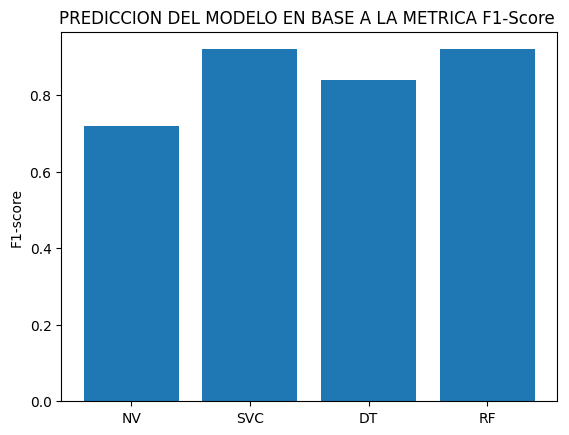

In [ ]:
# F1-score
ModelosdeP = ['NV', 'SVC', 'DT', 'RF']
ResultadoP = [0.72, 0.92, 0.84, 0.92]

fig, ax = plt.subplots()
#etiqueta en el eje Y
ax.set_ylabel('F1-score')
#etiqueta en el eje X
ax.set_title('PREDICCION DEL MODELO EN BASE A LA METRICA F1-Score ')
plt.bar(ModelosdeP, ResultadoP)
plt.savefig('barras_simple.png')
plt.show()